# BASIC STATISTICS

## STEP 1 :- Import LIB & Files 

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [80]:
from sklearn.preprocessing import StandardScaler

In [7]:
df=pd.read_csv('sales_data_with_discounts.csv')

## STEP 2:- Data Exploration

In [9]:
print(df.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [10]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [11]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [12]:
print(df.describe)

<bound method NDFrame.describe of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discou

In [13]:
num_col=df.select_dtypes(include=['int64','float64']).columns
print('Numerical columns:',num_col) #print the numerical values
cat_col=df.select_dtypes(include=['object']).columns
print('Categorical columns:',cat_col) #print the categorical values

Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')
Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [14]:
des_stats = {}
for col in num_col: # Loop through the numerical columns and compute statistics
    des_stats[col] = {
        'MEAN': df[col].mean(),
        'MEDIAN': df[col].median(),
        'MODE': df[col].mode()[0], # Mode could have multiple values, so take the first one
        'STD_DEV': df[col].std()
    }
for col, stats in des_stats.items():# Print the computed statistics for each column
    print(f'Statistics for {col}:')
    print(f' MEAN              : {stats["MEAN"]}')
    print(f' MEDIAN            : {stats["MEDIAN"]}')
    print(f' MODE              : {stats["MODE"]}')
    print(f' Standard Deviation: {stats["STD_DEV"]}')
    print('\n')


Statistics for Volume:
 MEAN              : 5.066666666666666
 MEDIAN            : 4.0
 MODE              : 3
 Standard Deviation: 4.231602391213926


Statistics for Avg Price:
 MEAN              : 10453.433333333332
 MEDIAN            : 1450.0
 MODE              : 400
 Standard Deviation: 18079.90483993645


Statistics for Total Sales Value:
 MEAN              : 33812.83555555555
 MEDIAN            : 5700.0
 MODE              : 24300
 Standard Deviation: 50535.07417255328


Statistics for Discount Rate (%):
 MEAN              : 15.155241895330914
 MEDIAN            : 16.57776564929597
 MODE              : 5.007822189204133
 Standard Deviation: 4.220602153325511


Statistics for Discount Amount:
 MEAN              : 3346.499424342415
 MEDIAN            : 988.9337332382784
 MODE              : 69.17794228822787
 Standard Deviation: 4509.9029633539985


Statistics for Net Sales Value:
 MEAN              : 30466.336131270138
 MEDIAN            : 4677.788059301853
 MODE              : 326.

# STEP 3:- Data Visualization

## (i) NUMERICAL

### HISTOGRAMS

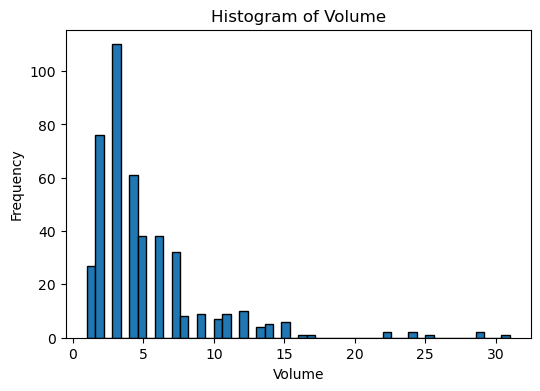

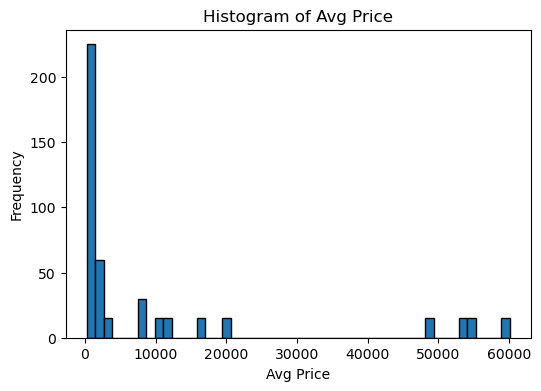

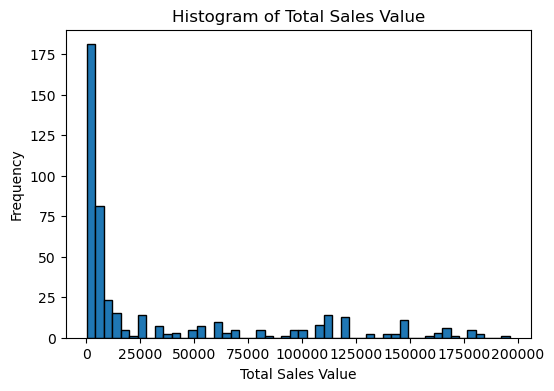

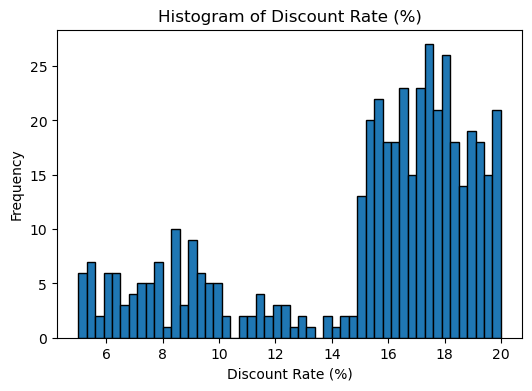

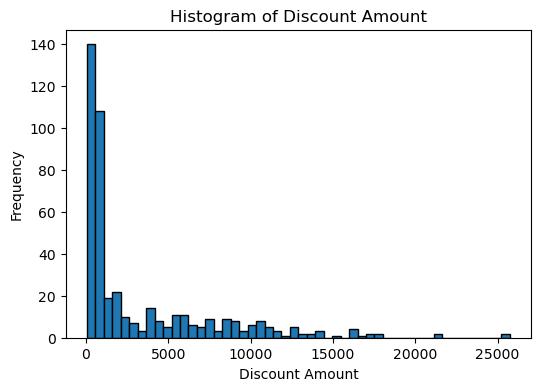

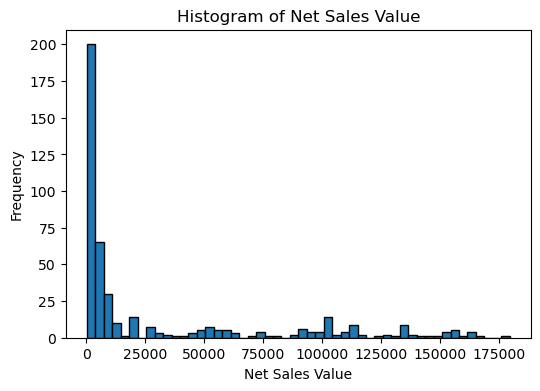

In [18]:
for col in num_col:
    plt.figure(figsize=(6,4))
    plt.hist(df[col],bins=50,edgecolor='k',alpha=1)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
 

### BOXPLOTS

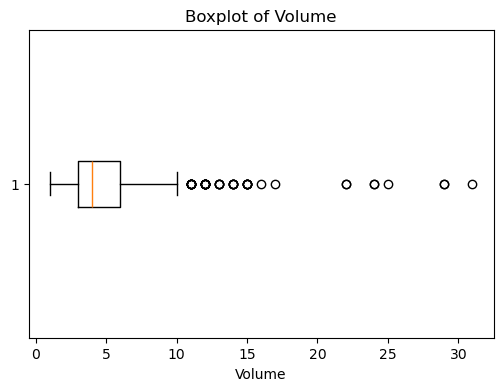

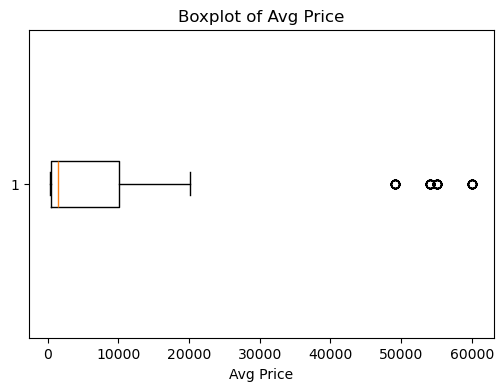

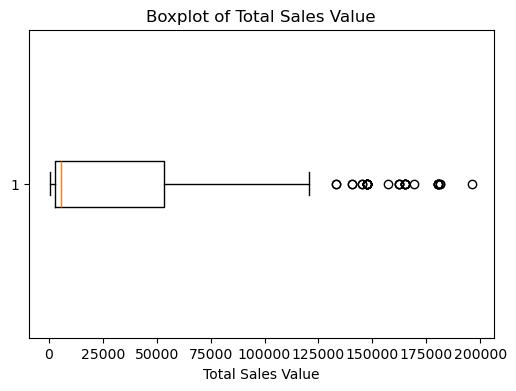

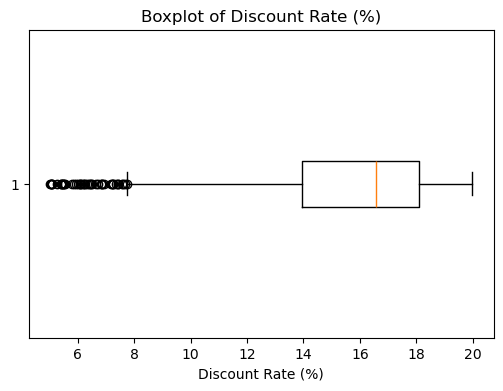

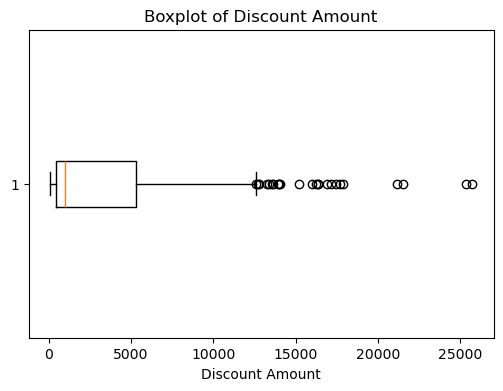

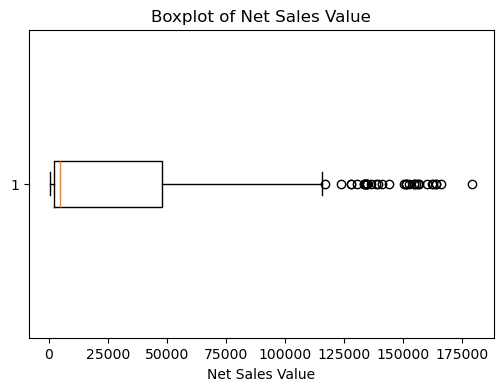

In [20]:
for col in num_col:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col],vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

### (ii) CATEGORICAL

### BARCHART

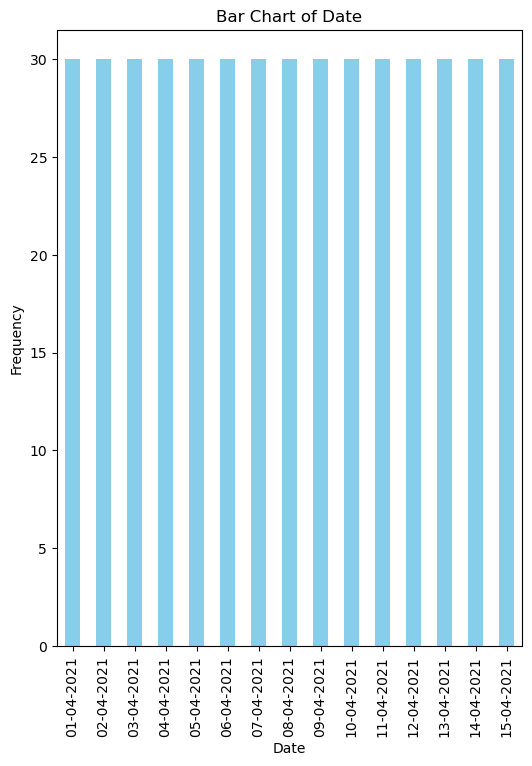

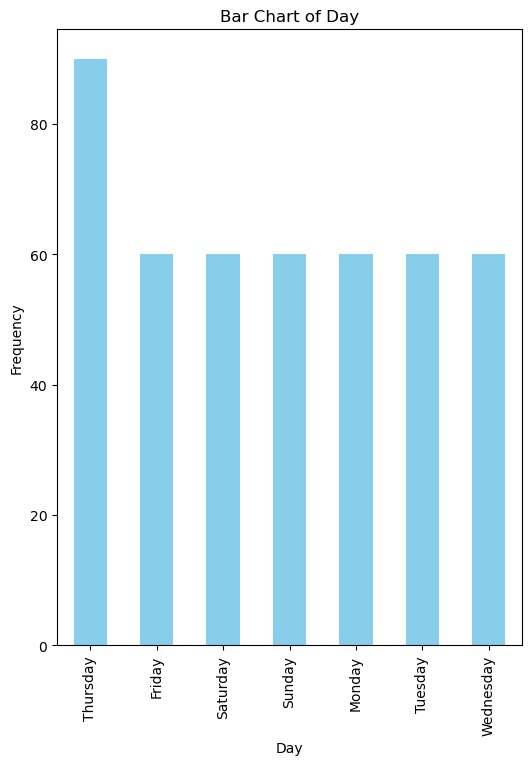

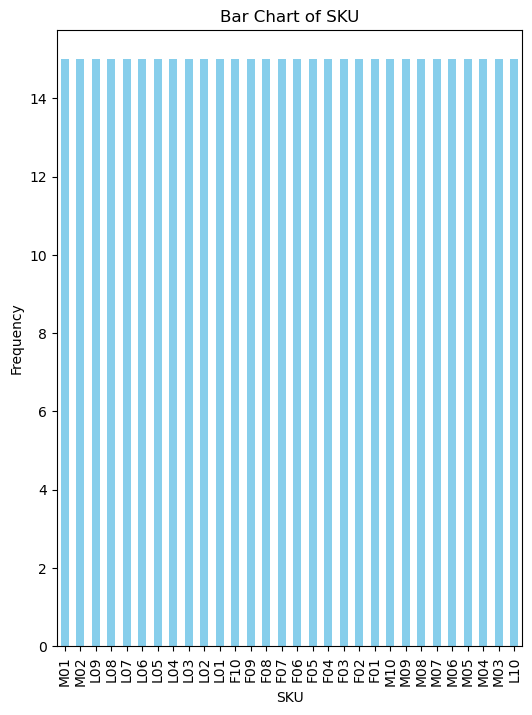

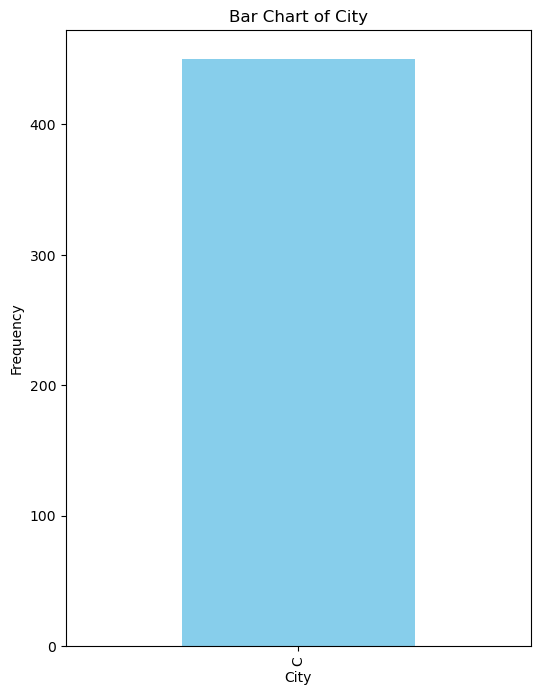

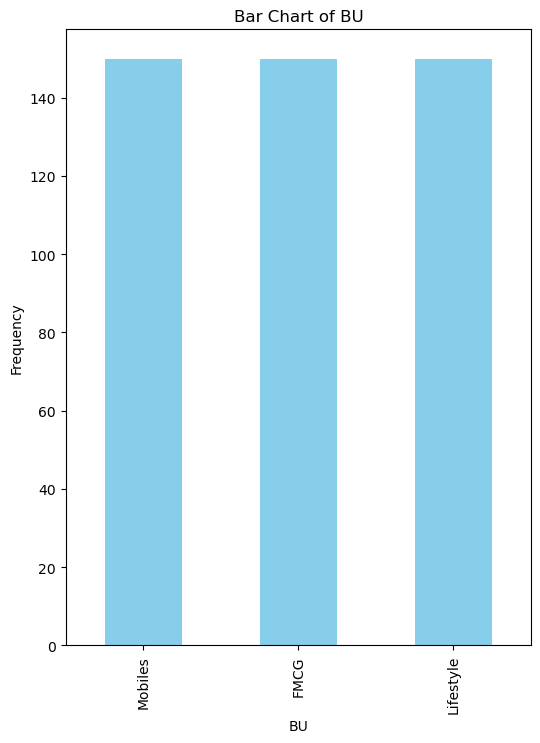

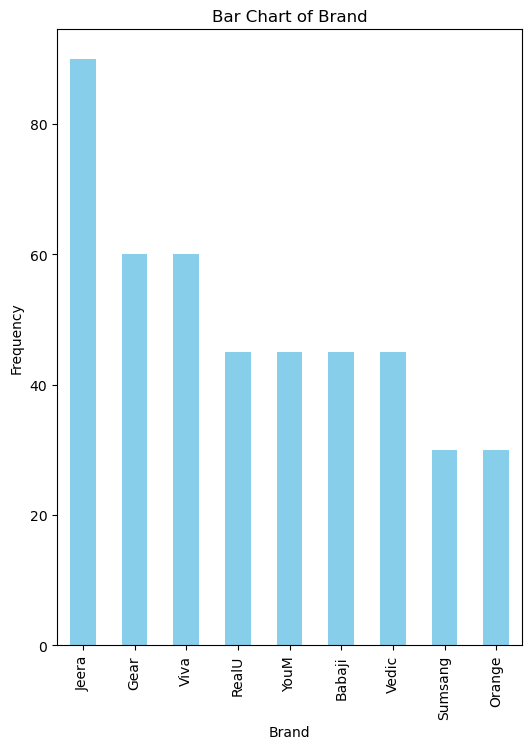

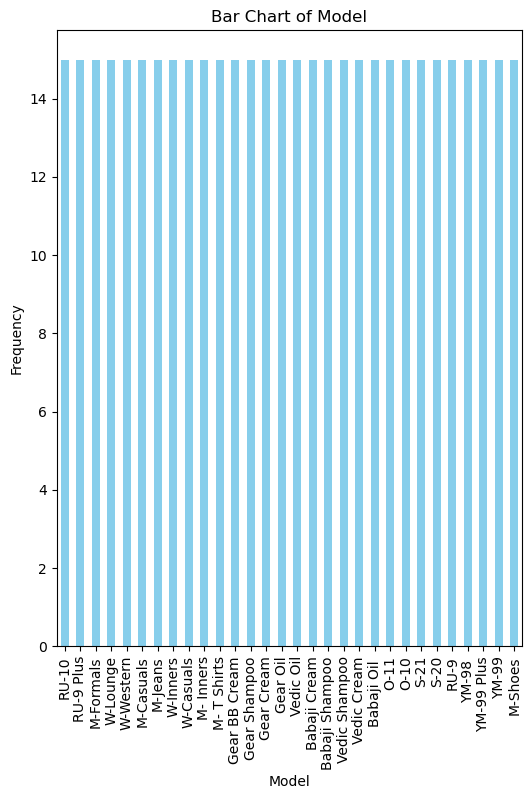

In [82]:
for col in cat_col:
    plt.figure(figsize=(6,8))
    df[col].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Frequency')

## STEP 4:- Standardization of NUM Value

In [25]:
standardized_data = df.copy()
for col in num_col:
    mean=df[col].mean()
    std =df[col].std()
    standardized_data[col]=(df[col]-mean)/std
print('Before standardization: \n')
print(df[num_col].head())
print('After standardization: \n')
print(standardized_data[num_col].head())


Before standardization: 

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
After standardization: 

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552  

# STEP 5:- Conversion of Categorical Data into Dummy Variables

In [90]:
data_encoded = pd.get_dummies(df, columns=cat_col)
data_encoded = data_encoded.astype(int)
print(data_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500                 11            21153   
1      10      10100             101000                 11            11676   
2       7      16100             112700                  9            10657   
3       6      20100             120600                  6             8364   
4       3       8100              24300                 17             4372   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0           160346                1                0                0   
1            89323                1                0                0   
2           102042                1                0                0   
3           112235                1                0                0   
4            19927                1                0                0   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0                0  ...

# CONCLUTION

## key Insights from Descriptive Analytics and Data Visualizations:

## Importance of Data Preprocessing: